## Final Project Submission

Please fill out:
* Student name:                           ``Dahir Ahmed``
* Student pace:                             ``Part time`` 
* Scheduled project review date/time:       ``27TH OCT TO  31ST OCT 2025``
* Instructor name:                           ``Brian Chacha``
* Blog post URL:


## INTRODUCATION 
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


In [1]:
# Your code here - remember to use markdown cells for comments as well!
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and working with arrays
import numpy as np


# Import the warnings module to control or suppress warning messages
import warnings

# Suppress all warning messages to keep the output clean
warnings.filterwarnings('ignore')



1.1) Read Aviation_Data.csv into a pandas DataFrame named df

In [2]:
# Load the CSV file "Aviation_Data.csv" from the 'data' folder into a pandas DataFrame named 'df'

df = pd.read_csv("./data/Aviation_Data.csv")

# Display the first 5 rows of the DataFrame to quickly inspect the data

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Display the shape (rows, columns)
df.shape

# Print the number of rows and columns in a readable format
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


This dataset has 90348 rows and 31 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# How to Find Duplicates in our Aviation Data 

our data has **90,348 rows** and **31 columns**.  
Sometimes the **same crash** gets entered **twice** by mistake.  
We want to **find & remove** those duplicates so our analysis is clean!



In [5]:
duplicate_rows = df.duplicated().sum()

print(f"There are {duplicate_rows} duplicate rows in this dataset.")


There are 1390 duplicate rows in this dataset.


In [6]:
#If you don’t want to modify the original DataFrame:

cleaned_df = df.drop_duplicates()

## How to Find Missing Values in Our Aviation Data

Our dataset(cleaned) has ``88,958`` rows and ``31`` columns.
Sometimes, during data entry, some information gets left blank — like the aircraft type, location, or number of fatalities.

These missing values ``(NaNs)`` can affect our analysis, so we need to identify and handle them before moving forward!

## We’ll check:

1. How many missing values exist in each column

2. Which columns have the most missing data

3. And decide whether to fill, drop, or keep them depending on their importance.

In [8]:
#Check missing data percentages:
cleaned_df.isnull().mean().sort_values(ascending=False) * 100 


Schedule                  85.856247
Air.carrier               81.285550
FAR.Description           64.002113
Aircraft.Category         63.705344
Longitude                 61.360417
Latitude                  61.350300
Airport.Code              43.645316
Airport.Name              40.754064
Broad.phase.of.flight     30.614447
Publication.Date          17.198004
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Fatal.Injuries      12.893725
Engine.Type                8.054363
Report.Status              7.253985
Purpose.of.flight          7.038153
Number.of.Engines          6.916747
Total.Uninjured            6.723398
Weather.Condition          5.127139
Aircraft.damage            3.668023
Registration.Number        1.631107
Injury.Severity            1.201691
Country                    0.331617
Amateur.Built              0.192226
Model                      0.180984
Make                       0.148385
Location                   0.136019
Event.Date                 0

In [9]:
cleaned_df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [10]:
#Get summary stats
cleaned_df.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88958,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,73659
unique,84468,71,88863,14782,27758,219,25589,27154,10356,24869,...,26,13590,NaN,NaN,NaN,NaN,4,12,17006,2923
top,2.02207E+13,Accident,DCA22LA135,6/30/1984,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,190,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,16317
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


### 1. Columns to **DROP** (too many blanks + not very helpful)

| Column                  | % Missing | Why drop it? |
|-------------------------|-----------|--------------|
| **Schedule**            | 86%       | Almost all rows are blank. It just says if the flight was on a regular schedule (like a bus). We already know from `Purpose.of.flight` if it was a normal passenger trip. |
| **Air.carrier**         | 82%       | Mostly empty. It's just the airline name (like "Delta"). We don’t need the name to understand the crash. |
| **FAR.Description**     | 65%       | A boring legal rule number. Missing for most small planes. Doesn’t help us predict injuries or damage. |
| **Aircraft.Category**   | 64%       | Says if it's a plane, helicopter, etc. But we already have `Make` and `Model` — that’s enough! |
| **Longitude / Latitude**| ~62%      | GPS numbers. Great for Google Maps, but more than half are missing. We still have city and airport to know *where*. |
| **Airport.Code**        | 44%       | The short code like "LAX" or "JFK". Many crashes happen **away** from airports, so it’s often blank. |
| **Airport.Name**        | 42%       | Same as above. We can just use the city name instead. |
| **Broad.phase.of.flight**| 32%    | Tells you *when* in the flight it crashed (takeoff? landing?). Helpful, but too many blanks and too many options. Hard to guess the missing ones. |
| **Publication.Date**    | 18%       | This is the day the **report** came out — not the crash day. Totally useless for understanding the accident. |

---



In [11]:
cols_to_drop = [
    'Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category',
    'Longitude', 'Latitude', 'Airport.Code', 'Airport.Name',
    'Broad.phase.of.flight', 'Publication.Date'
]

cleaned_df= cleaned_df.drop(columns=cols_to_drop)

In [12]:
cleaned_df.isnull().mean().sort_values(ascending=False) * 100 

Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Fatal.Injuries      12.893725
Engine.Type                8.054363
Report.Status              7.253985
Purpose.of.flight          7.038153
Number.of.Engines          6.916747
Total.Uninjured            6.723398
Weather.Condition          5.127139
Aircraft.damage            3.668023
Registration.Number        1.631107
Injury.Severity            1.201691
Country                    0.331617
Amateur.Built              0.192226
Model                      0.180984
Make                       0.148385
Location                   0.136019
Event.Date                 0.077565
Accident.Number            0.077565
Event.Id                   0.077565
Investigation.Type         0.000000
dtype: float64

### 2. Columns to **KEEP** (a little blank is okay — they’re super important!)

| Column | % Missing | Why keep it? |
|--------|-----------|--------------|
| **Total.Serious.Injuries** | 15% | This tells us how many people got **really hurt**. Most crashes have 0 — so we can just fill blanks with **0**. |
| **Total.Minor.Injuries** | 15% | Same idea — small cuts or bruises. Fill blanks with **0**. |
| **Total.Fatal.Injuries** | 14% | **Super important!** How many people died. We *must* keep this. Fill blanks with **0**. |
| **Engine.Type** | 9% | Is it a normal engine or a jet? Big difference in crashes. Easy to fill with “Unknown” if missing. |
| **Report.Status** | 9% | Says if the report is “final” or “still being checked”. Helps us know if the data is ready. |
| **Purpose.of.flight** | 8% | Was it a normal passenger flight? Training? Crop dusting? **Tells us a lot** about the risk. |
| **Number.of.Engines** | 8% | 1 engine or 2+? Two engines = safer usually. Easy to guess if missing. |
| **Total.Uninjured** | 8% | How many people walked away fine. Completes the story! Fill with a number if missing. |
| **Weather.Condition** | 7% | Was it sunny or stormy? Weather causes many crashes. Most are “good weather” — so fill with that. |
| **Aircraft.damage** | 5% | Did the plane get scratched or totally destroyed? **Main thing** we want to predict. |
| **Registration.Number** | 3% | The plane’s license plate (like N123AB). Helps find duplicates. |
| **Injury.Severity** | 3% | Says “Fatal” or “Minor” in one word. We can make it from the injury counts if needed. |
| **Country, Amateur.Built, Model, Make, Location, Event.Date, Accident.Number, Event.Id** | ≤ 2% | Almost no blanks! These are **must-haves**: 



In [13]:
# checking country which appears most 
cleaned_df['Country'].value_counts().head()

Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Name: count, dtype: int64

In [14]:
#any missing value will be replaced with mode country which is United states
cleaned_df['Country'].fillna('United States', inplace=True)


In [15]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88958 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null  obj

In [16]:
# lets get numeric column to see use mean mode or median to fill empty cells
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns
print(numeric_cols.tolist())


['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']


In [17]:
# Will use the number of engine using make
mode_value = cleaned_df['Number.of.Engines'].mode()[0]
median_value = cleaned_df['Number.of.Engines'].median()
mean_value = cleaned_df['Number.of.Engines'].mean()

print(f"Mode: {mode_value}, Median: {median_value}, Mean: {mean_value:.2f}")


Mode: 1.0, Median: 1.0, Mean: 1.15


In [18]:
# Replace missing or zero engine counts with 1
cleaned_df['Number.of.Engines'] = cleaned_df['Number.of.Engines'].replace(0, np.nan)
cleaned_df['Number.of.Engines'].fillna(1, inplace=True)

## Fill missing injury counts with zero

In [19]:
injury_cols = ['Total.Fatal.Injuries', 
               'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 
               'Total.Uninjured']

# Replace NaN with 0
cleaned_df[injury_cols] = cleaned_df[injury_cols].fillna(0)


In [20]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88958 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       88958 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null  obj

`` our Investigation.Type column and number has many entries of 88958 but generally the event id has 88889 ``
 

In [21]:
cleaned_df['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
3/12/2020         1
8/9/2022          1
1/11/2022         1
              ...  
17-12-2021        1
16-11-2021        1
16-07-2021        1
15-12-2022        1
3/11/2020         1
Name: count, Length: 71, dtype: int64

#### cleaning event id where is null will solve the problem
`` our Investigation.Type column and number has many entries of 88958 but generally the event id has 88889 ``
 

In [22]:
# cleaning event id where is null will solve the problem
cleaned_df['Event.Id'].isna().sum()

69

In [23]:
# Drop rows where Event.Id is missing
cleaned_df = cleaned_df.dropna(subset=['Event.Id']).reset_index(drop=True)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [25]:
cleaned_df['Report.Status'].value_counts()

#DROP THIS COLUMN NOT NECESSARY

Report.Status
Probable Cause                                                                                                                                                                                        61754
Foreign                                                                                                                                                                                                1999
<br /><br />                                                                                                                                                                                            167
Factual                                                                                                                                                                                                 145
The pilot's failure to maintain directional control during the landing roll.                                                                                              

In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

Location                88837 
Injury.Severity         87889
Aircraft.damage         85695
Registration.Number     87507
Make                    88826 
Model                   88797 
Amateur.Built           88787
Engine.Type             81793 
Purpose.of.flight       82697
Weather.Condition       84397
Report.Status           82505
required data           88889

In [27]:
#checking the weather conditions
cleaned_df['Weather.Condition'].value_counts(normalize=True)*100
 # will use mode to fill missing value

Weather.Condition
VMC    91.594488
IMC     7.080820
UNK     1.014254
Unk     0.310438
Name: proportion, dtype: float64

In [28]:
# Get the most frequent Weather.Condition
weather_mode = cleaned_df['Weather.Condition'].mode()[0]
# Fill missing values with the mode
cleaned_df['Weather.Condition'] = cleaned_df['Weather.Condition'].fillna(weather_mode)

In [29]:
cleaned_df['Location'].value_counts(normalize=True)*100

# will FILL WITH UNKNOWN

Location
ANCHORAGE, AK               0.488535
MIAMI, FL                   0.225131
ALBUQUERQUE, NM             0.220629
HOUSTON, TX                 0.217252
CHICAGO, IL                 0.207121
                              ...   
ELK GARDEN, VA              0.001126
PIURA, Peru                 0.001126
TOQUI, Venezuela            0.001126
NORTH ELEUTHERA, Bahamas    0.001126
Brasnorte,                  0.001126
Name: proportion, Length: 27758, dtype: float64

In [30]:
cleaned_df['Location'] = cleaned_df['Location'].fillna('Unknown')

In [31]:
cleaned_df['Injury.Severity'].value_counts(normalize=True)*100

# will use mode to fill missing values

Injury.Severity
Non-Fatal     76.638715
Fatal(1)       7.016805
Fatal          5.987097
Fatal(2)       4.222371
Incident       2.524776
                ...    
Fatal(60)      0.001138
Fatal(270)     0.001138
Fatal(143)     0.001138
Fatal(83)      0.001138
Fatal(189)     0.001138
Name: proportion, Length: 109, dtype: float64

In [32]:
# Get the most frequent injury severity
injury_mode = cleaned_df['Injury.Severity'].mode()[0]

# Fill missing values with the mode
cleaned_df['Injury.Severity'] = cleaned_df['Injury.Severity'].fillna(injury_mode)


In [33]:
cleaned_df['Engine.Type'].value_counts(normalize=True)*100

# will use mode to fill missing value

Engine.Type
Reciprocating      85.007274
Turbo Shaft         4.412358
Turbo Prop          4.145832
Turbo Fan           3.033267
Unknown             2.507550
Turbo Jet           0.859487
Geared Turbofan     0.014671
Electric            0.012226
LR                  0.002445
NONE                0.002445
Hybrid Rocket       0.001223
UNK                 0.001223
Name: proportion, dtype: float64

In [34]:
# Get the most frequent Engine.Type
Engine_type_mode = cleaned_df['Engine.Type'].mode()[0]
# Fill missing values with the mode
cleaned_df['Engine.Type'] = cleaned_df['Engine.Type'].fillna(Engine_type_mode)


In [35]:
cleaned_df['Aircraft.damage'].value_counts(normalize=True)*100

# FILL WITH UNKNOWN 

Aircraft.damage
Substantial    74.856176
Destroyed      21.731723
Minor           3.273236
Unknown         0.138865
Name: proportion, dtype: float64

In [36]:
cleaned_df['Aircraft.damage']= cleaned_df['Aircraft.damage'].fillna('Unknown')

In [37]:
cleaned_df['Registration.Number'].value_counts()

# DROP THIS COLUMN

Registration.Number
NONE      344
UNREG     126
UNK        13
USAF        9
N20752      8
         ... 
N8266R      1
N65737      1
N681UP      1
N53084      1
N9026P      1
Name: count, Length: 79104, dtype: int64

In [38]:
# Drop Registration.Number col because it is not useful for analysis
cleaned_df = cleaned_df.drop(columns=['Registration.Number'])

In [39]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Total.Fatal.Injuries    88889 non-null

In [40]:
#CHECK MAKE DISTRIBUTION
cleaned_df['Make'].value_counts()

#FILL BLACKS WITH UNKNOWN


Make
Cessna           22227
Piper            12029
CESSNA            4922
Beech             4330
PIPER             2841
                 ...  
Motley Vans          1
Perlick              1
Knab-douglas         1
Boykin B J           1
ROYSE RALPH L        1
Name: count, Length: 8237, dtype: int64

In [41]:
cleaned_df['Make']= cleaned_df['Make'].fillna('Unknown')

In [42]:
#CHECK MAKE DISTRIBUTION
cleaned_df['Model'].value_counts()

#FILL BLACKS WITH UNKNOWN

Model
152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
737-3S3                1
MBB-BK117-B2           1
GLASSAIR GL25          1
ULTIMATE 10-300S       1
M-8 EAGLE              1
Name: count, Length: 12315, dtype: int64

In [43]:
cleaned_df['Model'] =cleaned_df['Model'].fillna('Unknown')

In [44]:
cleaned_df['Model'].value_counts()

Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
             ... 
C-414           1
EA-200          1
126-D           1
HAWK H2X        1
M-8 EAGLE       1
Name: count, Length: 12315, dtype: int64

In [45]:
cleaned_df['Amateur.Built'].value_counts()
# fill missing values with mode

Amateur.Built
No     80312
Yes     8475
Name: count, dtype: int64

In [46]:
Amateur_built_mode =cleaned_df['Amateur.Built'].mode()[0] 

cleaned_df['Amateur.Built'] = cleaned_df['Amateur.Built'].fillna(Amateur_built_mode)

In [47]:
cleaned_df['Purpose.of.flight'].value_counts(normalize=True)*100

# fill missing values with unknown

Purpose.of.flight
Personal                     59.794188
Instructional                12.819087
Unknown                       8.225208
Aerial Application            5.697909
Business                      4.858701
Positioning                   1.990399
Other Work Use                1.528471
Ferry                         0.981898
Aerial Observation            0.960132
Public Aircraft               0.870648
Executive/corporate           0.668706
Flight Test                   0.489740
Skydiving                     0.220081
External Load                 0.148736
Public Aircraft - Federal     0.126970
Banner Tow                    0.122133
Air Race show                 0.119714
Public Aircraft - Local       0.089483
Public Aircraft - State       0.077391
Air Race/show                 0.071345
Glider Tow                    0.064089
Firefighting                  0.048369
Air Drop                      0.013302
ASHO                          0.007255
PUBS                          0.004837
PUBL   

In [48]:
cleaned_df['Purpose.of.flight']= cleaned_df['Purpose.of.flight'].fillna('Unknown')

In [49]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Make                    88889 non-null  object 
 9   Model                   88889 non-null  object 
 10  Amateur.Built           88889 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       88889 non-null  object 
 14  Total.Fatal.Injuries    88889 non-null

In [50]:
cleaned_df['Report.Status'].value_counts()

#drop this column

Report.Status
Probable Cause                                                                                                                                                                                        61754
Foreign                                                                                                                                                                                                1999
<br /><br />                                                                                                                                                                                            167
Factual                                                                                                                                                                                                 145
The pilot's failure to maintain directional control during the landing roll.                                                                                              

In [51]:
cleaned_df = cleaned_df.drop(columns=['Report.Status'])


In [52]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Make                    88889 non-null  object 
 9   Model                   88889 non-null  object 
 10  Amateur.Built           88889 non-null  object 
 11  Number.of.Engines       88889 non-null  float64
 12  Engine.Type             88889 non-null  object 
 13  Purpose.of.flight       88889 non-null  object 
 14  Total.Fatal.Injuries    88889 non-null

In [53]:
# exporting the cleaned data to csv for visualization and further Analysis 
cleaned_df.to_csv('cleaned_aircraft_data.csv', index=False)


 ## Core Analysis Directions

In [54]:
df1 = pd.read_csv('cleaned_aircraft_data.csv')
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC


In [55]:
# Check basic statistics and value distributions
print("Injury Severity Distribution:")
print(df['Injury.Severity'].value_counts())

print("\nAircraft Damage Distribution:")
print(df['Aircraft.damage'].value_counts())

print("\nTop 10 Aircraft Makes:")
print(df['Make'].value_counts().head(10))

print("\nFlight Purpose Distribution:")
print(df['Purpose.of.flight'].value_counts())

Injury Severity Distribution:
Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(60)         1
Fatal(270)        1
Fatal(143)        1
Fatal(83)         1
Fatal(189)        1
Name: count, Length: 109, dtype: int64

Aircraft Damage Distribution:
Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

Top 10 Aircraft Makes:
Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

Flight Purpose Distribution:
Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry               

In [56]:
# Group by Make/Model to calculate safety metrics
aircraft_safety = df.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum', 
    'Total.Uninjured': 'sum',
    'Event.Id': 'count'  # Total incidents
}).rename(columns={'Event.Id': 'Total_Incidents'})

In [57]:
# Calculate safety ratios using original column names
aircraft_safety['Survival_Rate'] = aircraft_safety['Total.Uninjured'] / (
    aircraft_safety['Total.Fatal.Injuries'] + aircraft_safety['Total.Serious.Injuries'] + 
    aircraft_safety['Total.Minor.Injuries'] + aircraft_safety['Total.Uninjured']
)
aircraft_safety['Fatality_Rate'] = aircraft_safety['Total.Fatal.Injuries'] / (
    aircraft_safety['Total.Fatal.Injuries'] + aircraft_safety['Total.Serious.Injuries'] + 
    aircraft_safety['Total.Minor.Injuries'] + aircraft_safety['Total.Uninjured']
)


In [58]:
# Handle division by zero
aircraft_safety = aircraft_safety.fillna(0)

# Reset index to make Make and Model regular columns
aircraft_safety = aircraft_safety.reset_index()

print("Safety analysis completed!")
print(f"Analyzed {len(aircraft_safety)} unique aircraft models")

Safety analysis completed!
Analyzed 20135 unique aircraft models


In [59]:
# Convert Event.Date to datetime and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year

In [60]:
df1['Weather.Condition'].value_counts()

Weather.Condition
VMC    81795
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

In [61]:
# Standardize Weather.Condition - convert all 'unk' variations to 'UNK'
def standardize_weather(weather):
    if pd.isna(weather):
        return 'UNK'
    weather_str = str(weather).strip()
    if weather_str.lower() in ['unk', 'unknown']:
        return 'UNK'
    return weather_str

# Apply the standardization
cleaned_df['Weather.Condition'] = cleaned_df['Weather.Condition'].apply(standardize_weather)

# Verify the changes
print("Weather Condition value counts after standardization:")
print(cleaned_df['Weather.Condition'].value_counts())

Weather Condition value counts after standardization:
Weather.Condition
VMC    81795
IMC     5976
UNK     1118
Name: count, dtype: int64


In [62]:
def calculate_safety_score(group):
    total_fatal = group['Total.Fatal.Injuries'].sum()
    total_serious = group['Total.Serious.Injuries'].sum()
    total_minor = group['Total.Minor.Injuries'].sum()
    total_uninjured = group['Total.Uninjured'].sum()
    total_incidents = group['Event.Id'].count()
    
    # Avoid division by zero
    total_people = total_fatal + total_serious + total_minor + total_uninjured
    if total_people == 0:
        survival_rate = 0
        fatality_rate = 0
    else:
        survival_rate = total_uninjured / total_people
        fatality_rate = total_fatal / total_people
    
    return pd.Series({
        'Total_Incidents': total_incidents,
        'Total_Fatal_Injuries': total_fatal,
        'Total_Serious_Injuries': total_serious,
        'Total_Minor_Injuries': total_minor,
        'Total_Uninjured': total_uninjured,
        'Survival_Rate': survival_rate,
        'Fatality_Rate': fatality_rate
    })

In [63]:
# Analyze by flight purpose
purpose_safety = df.groupby('Purpose.of.flight').apply(calculate_safety_score).reset_index()
purpose_safety = purpose_safety.sort_values('Survival_Rate', ascending=False)
print("Safety by Flight Purpose:")
print(purpose_safety[['Purpose.of.flight', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']])

Safety by Flight Purpose:
            Purpose.of.flight  Survival_Rate  Fatality_Rate  Total_Incidents
16                       PUBL       1.000000       0.000000              1.0
25                    Unknown       0.900665       0.052957           6802.0
21  Public Aircraft - Federal       0.735537       0.112948            105.0
17                       PUBS       0.714286       0.000000              4.0
14              Instructional       0.695527       0.105767          10601.0
20            Public Aircraft       0.665737       0.161753            720.0
19                Positioning       0.642836       0.192366           1646.0
8         Executive/corporate       0.633255       0.235063            553.0
1          Aerial Application       0.603032       0.112454           4712.0
12                Flight Test       0.601043       0.169492            405.0
7                    Business       0.600780       0.214743           4018.0
24                  Skydiving       0.592949      

In [64]:
# Analyze by weather condition
weather_safety = df.groupby('Weather.Condition').apply(calculate_safety_score).reset_index()
weather_safety = weather_safety.sort_values('Survival_Rate', ascending=False)
print("\nSafety by Weather Condition:")
print(weather_safety[['Weather.Condition', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']])


Safety by Weather Condition:
  Weather.Condition  Survival_Rate  Fatality_Rate  Total_Incidents
2               Unk       0.928524       0.042991            262.0
3               VMC       0.821402       0.069183          77303.0
1               UNK       0.763603       0.178428            856.0
0               IMC       0.703767       0.209690           5976.0


In [65]:
# Temporal analysis: fatality rate by year
yearly_safety = df.groupby('Year').apply(calculate_safety_score).reset_index()

yearly_safety

,Year,Total_Incidents,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Survival_Rate,Fatality_Rate
0,1948.0,1.0,2.0,0.0,0.0,0.0,0.000000,1.000000
1,1962.0,1.0,4.0,0.0,0.0,0.0,0.000000,1.000000
2,1974.0,1.0,3.0,0.0,0.0,0.0,0.000000,1.000000
3,1977.0,1.0,2.0,0.0,0.0,0.0,0.000000,1.000000
4,1979.0,2.0,1.0,2.0,1.0,44.0,0.916667,0.020833
5,1981.0,1.0,4.0,0.0,0.0,0.0,0.000000,1.000000
6,1982.0,3593.0,1585.0,727.0,998.0,8314.0,0.715244,0.136356
7,1983.0,3556.0,1273.0,673.0,1048.0,15106.0,0.834586,0.070331
8,1984.0,3457.0,1229.0,697.0,1047.0,12495.0,0.807797,0.079454
9,1985.0,3096.0,1648.0,612.0,1108.0,11292.0,0.770259,0.112415


In [66]:
# Filter data from year 2000 onwards
df_recent = df[df['Year'] >= 2000]


In [67]:
# Redo aircraft safety analysis for recent data (2000 onwards)
aircraft_safety_recent = df_recent.groupby(['Make', 'Model']).apply(calculate_safety_score).reset_index()

# Filter models with at least 10 incidents in the recent period
reliable_recent_models = aircraft_safety_recent[aircraft_safety_recent['Total_Incidents'] >= 10]
reliable_recent_models = reliable_recent_models.sort_values('Survival_Rate', ascending=False)

print("Top 10 Safest Aircraft Models (2000 onwards):")
print(reliable_recent_models[['Make', 'Model', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']].head(10))

Top 10 Safest Aircraft Models (2000 onwards):
                          Make        Model  Survival_Rate  Fatality_Rate  \
4069                    Cessna         180J       1.000000            0.0   
2800                    Boeing          747       1.000000            0.0   
4806  DIAMOND AIRCRAFT IND INC     DA 20 C1       1.000000            0.0   
1828                    BOEING      737-800       0.998681            0.0   
3914                  Canadair  CL-600-2B19       0.996965            0.0   
1930                    BOEING          787       0.996735            0.0   
2759                    Boeing          737       0.996525            0.0   
1914                    BOEING          777       0.995280            0.0   
1868                    BOEING          757       0.995236            0.0   
1825                    BOEING      737-7H4       0.992801            0.0   

      Total_Incidents  
4069             10.0  
2800             11.0  
4806             11.0  
1828      

In [68]:
# Analyze by number of engines
engine_count_safety = df_recent.groupby('Number.of.Engines').apply(calculate_safety_score).reset_index()
engine_count_safety = engine_count_safety.sort_values('Survival_Rate', ascending=False)
print("\nSafety by Number of Engines (2000 onwards):")
print(engine_count_safety[['Number.of.Engines', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']])


Safety by Number of Engines (2000 onwards):
   Number.of.Engines  Survival_Rate  Fatality_Rate  Total_Incidents
4                4.0       0.979299       0.004551            144.0
2                2.0       0.932169       0.040680           4929.0
3                3.0       0.930799       0.053606             91.0
0                0.0       0.613100       0.061691            548.0
1                1.0       0.577269       0.175564          30551.0
6                8.0       0.314286       0.000000              3.0
5                6.0       0.000000       0.000000              1.0


In [69]:
# Analyze amateur-built aircraft
amateur_safety = df_recent.groupby('Amateur.Built').apply(calculate_safety_score).reset_index()
amateur_safety = amateur_safety.sort_values('Survival_Rate', ascending=False)
print("\nSafety by Amateur-Built (2000 onwards):")
print(amateur_safety[['Amateur.Built', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']])


Safety by Amateur-Built (2000 onwards):
  Amateur.Built  Survival_Rate  Fatality_Rate  Total_Incidents
0            No       0.841814       0.088549          36442.0
1           Yes       0.416536       0.226434           4672.0


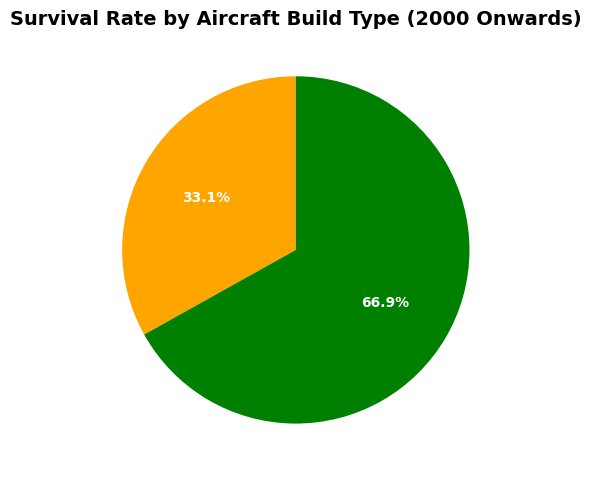

In [70]:
import matplotlib.pyplot as plt

# Data
labels = ['Amateur Built', 'Not Amateur Built']
sizes = [0.416536, 0.841814]  # survival rates
colors = ['orange', 'green']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'white', 'weight': 'bold'}
)

plt.title('Survival Rate by Aircraft Build Type (2000 Onwards)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


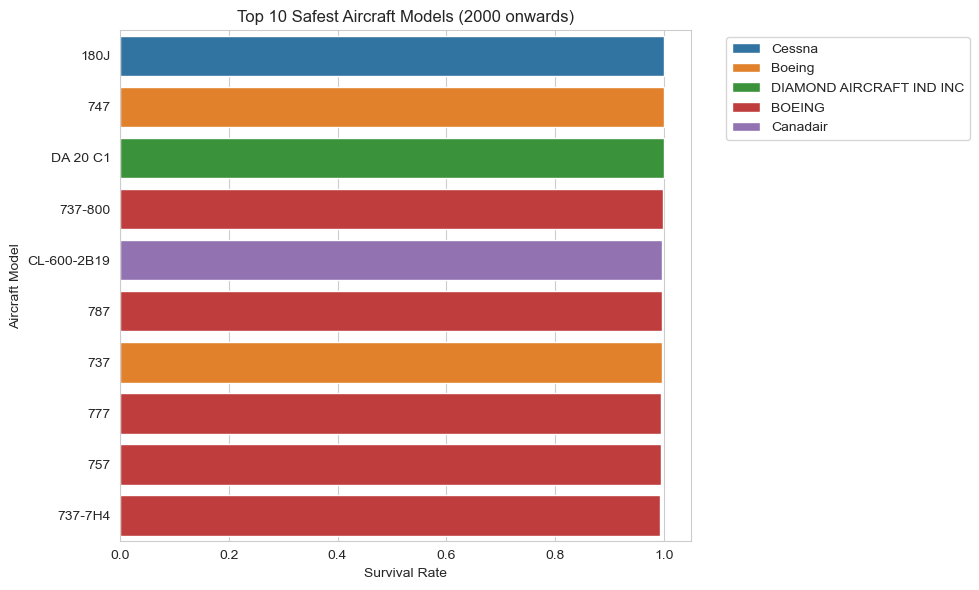

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
sns.set_style("whitegrid")

# Plot 1: Top 10 safest aircraft models (2000 onwards)
top_10_aircraft = reliable_recent_models.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_aircraft, x='Survival_Rate', y='Model', hue='Make', dodge=False)
plt.title('Top 10 Safest Aircraft Models (2000 onwards)')
plt.xlabel('Survival Rate')
plt.ylabel('Aircraft Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

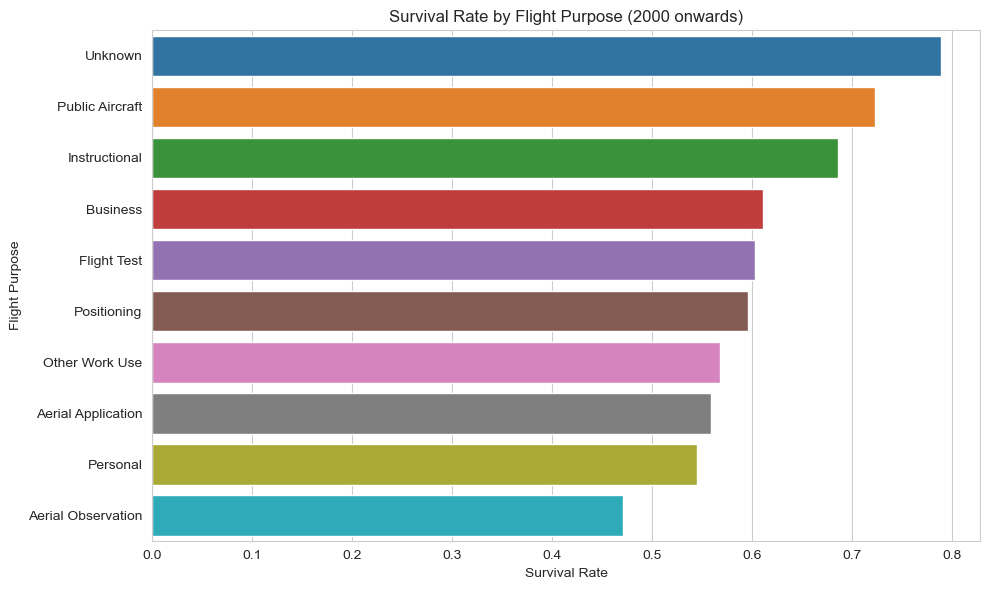

In [72]:
# Plot 2: Survival Rate by Flight Purpose (for top 10 purposes by incident count)
top_purposes = df_recent['Purpose.of.flight'].value_counts().head(10).index
purpose_safety_recent = df_recent[df_recent['Purpose.of.flight'].isin(top_purposes)].groupby('Purpose.of.flight').apply(calculate_safety_score).reset_index()
purpose_safety_recent = purpose_safety_recent.sort_values('Survival_Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=purpose_safety_recent, x='Survival_Rate', y='Purpose.of.flight')
plt.title('Survival Rate by Flight Purpose (2000 onwards)')
plt.xlabel('Survival Rate')
plt.ylabel('Flight Purpose')
plt.tight_layout()
plt.show()

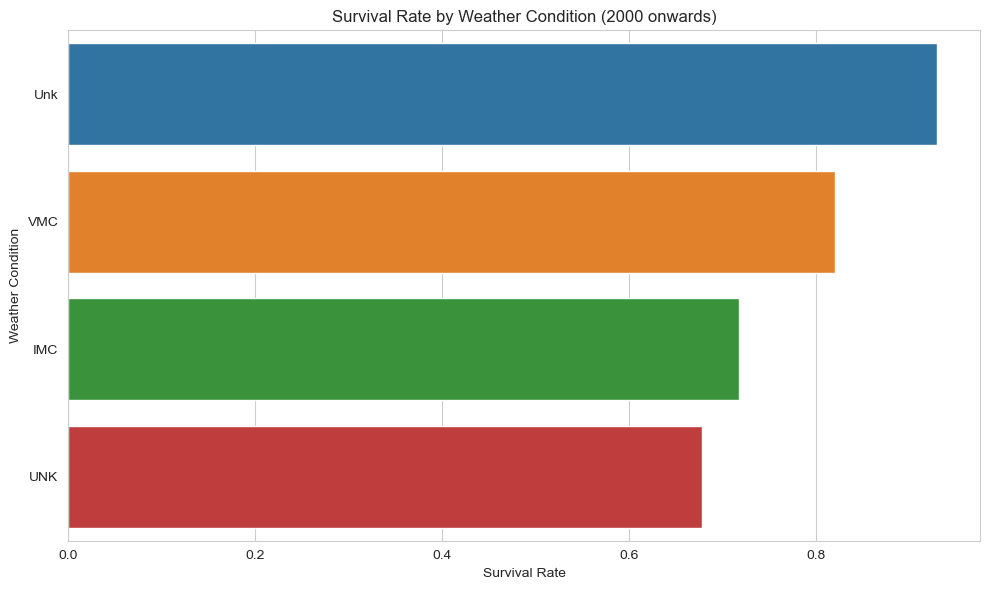

In [73]:
# Plot 3: Survival Rate by Weather Condition
weather_safety_recent = df_recent.groupby('Weather.Condition').apply(calculate_safety_score).reset_index()
weather_safety_recent = weather_safety_recent.sort_values('Survival_Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_safety_recent, x='Survival_Rate', y='Weather.Condition')
plt.title('Survival Rate by Weather Condition (2000 onwards)')
plt.xlabel('Survival Rate')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

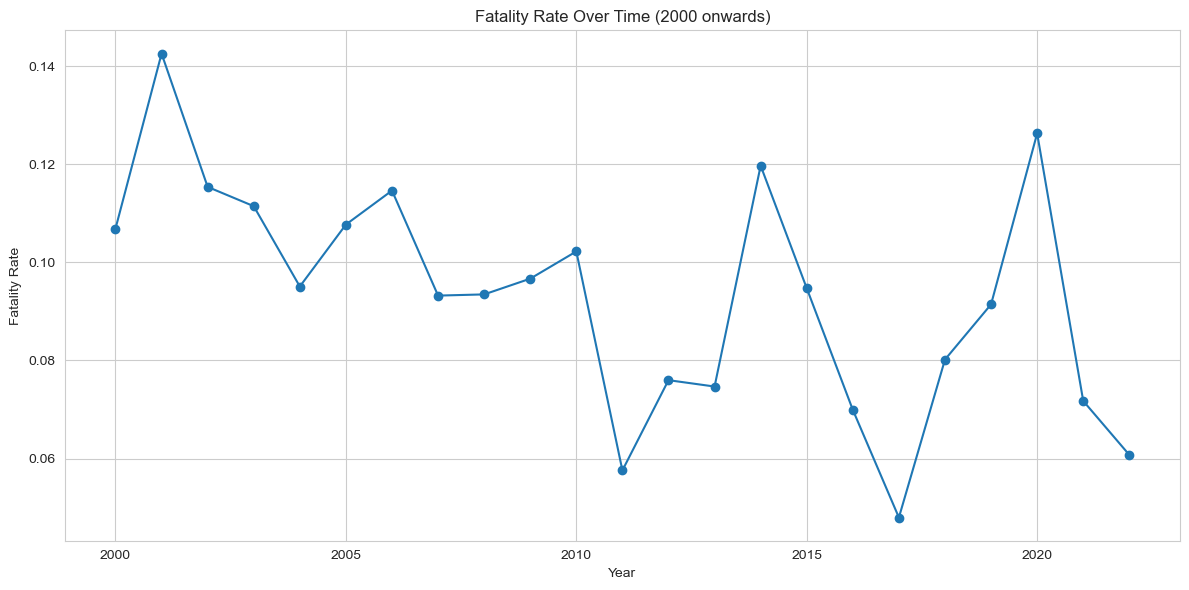

In [74]:
# Plot 4: Fatality Rate Over Time (2000 onwards)
yearly_safety_recent = df_recent.groupby('Year').apply(calculate_safety_score).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_safety_recent['Year'], yearly_safety_recent['Fatality_Rate'], marker='o')
plt.title('Fatality Rate Over Time (2000 onwards)')
plt.xlabel('Year')
plt.ylabel('Fatality Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Export the recent data for Tableau
df_recent.to_csv('aviation_safety_recent.csv', index=False)

In [76]:
# Amateur-built analysis for recent data
amateur_safety_recent = df_recent.groupby('Amateur.Built').apply(calculate_safety_score).reset_index()
print(amateur_safety_recent[['Amateur.Built', 'Survival_Rate', 'Fatality_Rate', 'Total_Incidents']])

  Amateur.Built  Survival_Rate  Fatality_Rate  Total_Incidents
0            No       0.841814       0.088549          36442.0
1           Yes       0.416536       0.226434           4672.0


##  Explore Operational Factors

In [77]:
# Analyze safety by flight purpose
purpose_safety = df.groupby('Purpose.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Event.Id': 'count'
}).reset_index()

purpose_safety['Safety_Score'] = purpose_safety['Total.Uninjured'] / (
    purpose_safety['Total.Fatal.Injuries'] + purpose_safety['Total.Uninjured'] + 0.1
)

print("Safety by Flight Purpose:")
print(purpose_safety.sort_values('Safety_Score', ascending=False))

Safety by Flight Purpose:
            Purpose.of.flight  Total.Fatal.Injuries  Total.Uninjured  \
17                       PUBS                   0.0              5.0   
16                       PUBL                   0.0              2.0   
25                    Unknown                9789.0         166487.0   
22    Public Aircraft - Local                  13.0             96.0   
14              Instructional                1913.0          12580.0   
21  Public Aircraft - Federal                  41.0            267.0   
1          Aerial Application                 549.0           2944.0   
20            Public Aircraft                 406.0           1671.0   
15             Other Work Use                 511.0           1878.0   
12                Flight Test                 130.0            461.0   
19                Positioning                 635.0           2122.0   
23    Public Aircraft - State                  23.0             65.0   
7                    Business         

In [78]:
# Analyze safety by weather conditions
weather_safety = df.groupby('Weather.Condition').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Uninjured': 'sum', 
    'Event.Id': 'count'
}).reset_index()

weather_safety['Safety_Score'] = weather_safety['Total.Uninjured'] / (
    weather_safety['Total.Fatal.Injuries'] + weather_safety['Total.Uninjured'] + 0.1
)

print("Safety by Weather Condition:")
print(weather_safety.sort_values('Safety_Score', ascending=False))

Safety by Weather Condition:
  Weather.Condition  Total.Fatal.Injuries  Total.Uninjured  Event.Id  \
2               Unk                 326.0           7041.0       262   
3               VMC               25558.0         303449.0     77303   
1               UNK                2407.0          10301.0       856   
0               IMC               11824.0          39684.0      5976   

   Safety_Score  
2      0.955736  
3      0.922317  
1      0.810585  
0      0.770442  


In [79]:
# Analyze safety by engine type
engine_safety = df.groupby('Engine.Type').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Event.Id': 'count'
}).reset_index()

engine_safety['Safety_Score'] = engine_safety['Total.Uninjured'] / (
    engine_safety['Total.Fatal.Injuries'] + engine_safety['Total.Uninjured'] + 0.1
)

print("Safety by Engine Type:")
print(engine_safety.sort_values('Safety_Score', ascending=False))

Safety by Engine Type:
        Engine.Type  Total.Fatal.Injuries  Total.Uninjured  Event.Id  \
1   Geared Turbofan                   0.0            121.0        12   
3                LR                   0.0             11.0         2   
6         Turbo Fan                4560.0         211048.0      2481   
7         Turbo Jet                 862.0          34072.0       703   
4              NONE                   0.0              2.0         2   
8        Turbo Prop                2568.0          16835.0      3391   
11          Unknown                3770.0          12794.0      2051   
0          Electric                   2.0              7.0        10   
5     Reciprocating               23642.0          75246.0     69530   
9       Turbo Shaft                1695.0           4858.0      3609   
2     Hybrid Rocket                   1.0              0.0         1   
10              UNK                   0.0              0.0         1   

    Safety_Score  
1       0.999174  
3 

Riskiest Make+Model in VMC (top 20, min events = 20):


,Make,Model,events,total_fatal,fatality_rate,survival_rate,most_common_injury
13844,PIPER,PA25,30,20.0,0.714286,0.285714,Fatal
12792,Mitsubishi,MU-2B-60,23,38.0,0.622951,0.377049,Non-Fatal
1942,BEECH,C90,22,33.0,0.568966,0.431034,Fatal
4826,CESSNA,421C,22,30.0,0.491803,0.508197,Fatal
1998,BEECH,V35,24,28.0,0.482759,0.517241,Fatal
16446,SOCATA,TBM 700,20,26.0,0.481481,0.518519,Non-Fatal
15256,ROBINSON,R44,131,138.0,0.480836,0.519164,Fatal
15261,ROBINSON,R66,22,17.0,0.472222,0.527778,Fatal
1858,BEECH,58,53,61.0,0.448529,0.551471,Non-Fatal
4914,CESSNA,T210,25,21.0,0.420000,0.580000,Non-Fatal



Safest Make+Model in VMC (top 20, min events = 20):


,Make,Model,events,total_fatal,fatality_rate,survival_rate,most_common_injury
2344,BOEING,777,81,0.0,0.0,1.0,Non-Fatal
16954,Schweizer,SGS 2-33A,53,0.0,0.0,1.0,Non-Fatal
9416,Grumman-schweizer,G-164A,48,0.0,0.0,1.0,Non-Fatal
2323,BOEING,767,46,0.0,0.0,1.0,Non-Fatal
3802,Boeing,737,45,0.0,0.0,1.0,Non-Fatal
3754,Boeing,727-200,35,0.0,0.0,1.0,Non-Fatal
3082,Beech,C-23,33,0.0,0.0,1.0,Non-Fatal
4078,Boeing,E75,29,0.0,0.0,1.0,Non-Fatal
2305,BOEING,757,27,0.0,0.0,1.0,Non-Fatal
12297,Maule,M-4-220C,26,0.0,0.0,1.0,Non-Fatal



Saved CSVs: vmc_make_model_stats.csv, vmc_riskiest_make_model.csv, vmc_safest_make_model.csv


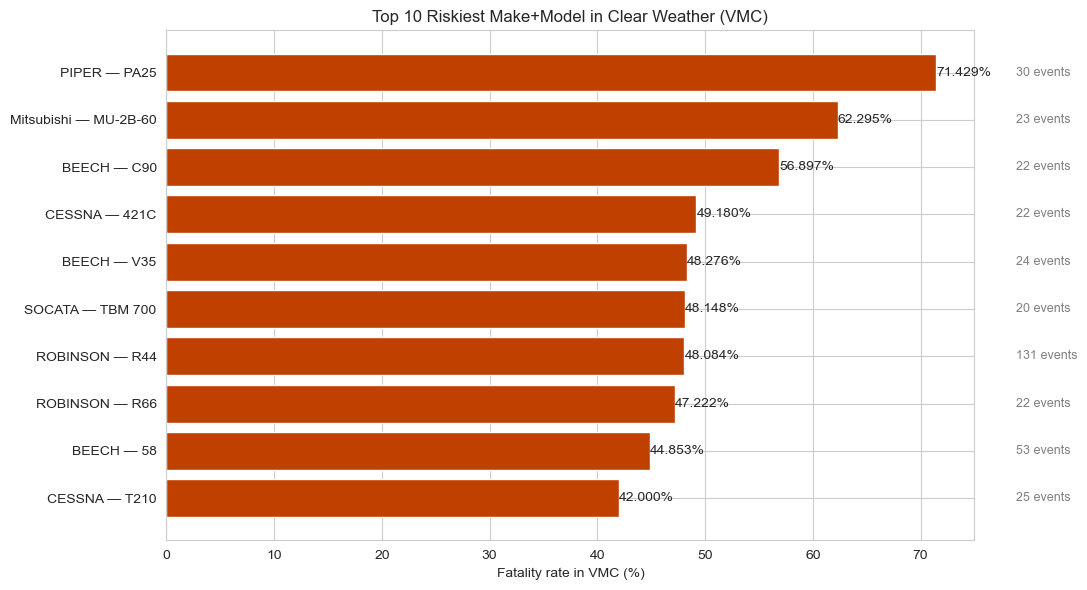

In [80]:


# Parameters (tune if needed)
vmc_label = 'VMC'      # label for clear weather in your dataset
min_events = 20        # minimum VMC events to consider a Make+Model (change to 30 for stricter)
top_n = 20             # how many riskiest to show

# Work on a copy so df1 remains unchanged
df = df1.copy()

# Make sure Weather.Condition standardized and uppercase
df['Weather.Condition'] = df['Weather.Condition'].astype(str).str.upper().str.strip()

# Filter to clear-weather events (VMC) only
df_vmc = df[df['Weather.Condition'] == vmc_label].copy()

# Ensure totals exist
df_vmc['total_casualties'] = (
    df_vmc['Total.Fatal.Injuries'].fillna(0)
    + df_vmc['Total.Serious.Injuries'].fillna(0)
    + df_vmc['Total.Minor.Injuries'].fillna(0)
)
df_vmc['people_involved'] = (df_vmc['total_casualties'] + df_vmc['Total.Uninjured'].fillna(0)).replace({0: np.nan})

# safe mode helper
def first_mode(s):
    m = s.mode()
    return m.iat[0] if len(m) > 0 else np.nan

# Group by Make + Model and compute stats in VMC
vmc_stats = (
    df_vmc
    .groupby(['Make','Model'], dropna=False)
    .agg(
        events = ('Event.Id','size'),
        total_fatal = ('Total.Fatal.Injuries','sum'),
        total_casualties = ('total_casualties','sum'),
        total_uninjured = ('Total.Uninjured','sum'),
        most_common_injury = ('Injury.Severity', lambda s: first_mode(s))
    )
    .reset_index()
)

# compute denom and rates
vmc_stats['denom'] = (vmc_stats['total_casualties'] + vmc_stats['total_uninjured']).replace({0: np.nan})
vmc_stats['fatality_rate'] = vmc_stats['total_fatal'] / vmc_stats['denom']            # fraction 0-1
vmc_stats['survival_rate'] = 1 - vmc_stats['fatality_rate']

# filter by minimum events to get reliable samples
vmc_reliable = vmc_stats[vmc_stats['events'] >= min_events].copy()

# Sort to get riskiest (highest fatality_rate) and safest (highest survival_rate)
riskiest_vmc = vmc_reliable.sort_values(by=['fatality_rate','events'], ascending=[False, False]).head(top_n)
safest_vmc = vmc_reliable.sort_values(by=['survival_rate','events'], ascending=[False, False]).head(top_n)

# Display top results
print(f"Riskiest Make+Model in VMC (top {top_n}, min events = {min_events}):")
display(riskiest_vmc[['Make','Model','events','total_fatal','fatality_rate','survival_rate','most_common_injury']].head(20))

print(f"\nSafest Make+Model in VMC (top {top_n}, min events = {min_events}):")
display(safest_vmc[['Make','Model','events','total_fatal','fatality_rate','survival_rate','most_common_injury']].head(20))

# Save CSV outputs for reporting
vmc_reliable.to_csv('vmc_make_model_stats.csv', index=False)
riskiest_vmc.to_csv('vmc_riskiest_make_model.csv', index=False)
safest_vmc.to_csv('vmc_safest_make_model.csv', index=False)
print("\nSaved CSVs: vmc_make_model_stats.csv, vmc_riskiest_make_model.csv, vmc_safest_make_model.csv")

# Quick bar chart of top 10 riskiest (fatality_rate %)
plot_n = min(10, len(riskiest_vmc))
if plot_n > 0:
    plot_df = riskiest_vmc.head(plot_n).copy()
    plot_df['label'] = plot_df['Make'].astype(str) + " — " + plot_df['Model'].astype(str)
    plot_df['fatality_pct'] = (plot_df['fatality_rate'] * 100).round(3)

    plt.figure(figsize=(11,6))
    plt.barh(plot_df['label'][::-1], plot_df['fatality_pct'][::-1], color='#C04000')
    plt.xlabel('Fatality rate in VMC (%)')
    plt.title(f'Top {plot_n} Riskiest Make+Model in Clear Weather (VMC)')
    for i, (pct, ev) in enumerate(zip(plot_df['fatality_pct'][::-1], plot_df['events'][::-1])):
        plt.text(pct + 0.01, i, f"{pct:.3f}%", va='center', fontsize=10)
        plt.text(max(plot_df['fatality_pct'].max()*1.1, 1.0) + 0.3, i, f"{int(ev)} events", va='center', fontsize=9, color='gray')
    plt.tight_layout()
    plt.savefig('vmc_riskiest_bar.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No Make+Model meets the min_events threshold in VMC to plot.")


In [81]:
df = df1.copy()

# standardize weather labels
df['Weather.Condition'] = df['Weather.Condition'].astype(str).str.upper().str.strip()
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK':'UNK', 'UNk':'UNK', 'Unk':'UNK'})  # catch variants

# computed fields
df['total_casualties'] = df['Total.Fatal.Injuries'].fillna(0) + df['Total.Serious.Injuries'].fillna(0) + df['Total.Minor.Injuries'].fillna(0)
df['people_involved'] = (df['total_casualties'] + df['Total.Uninjured'].fillna(0)).replace({0: np.nan})

# aggregate by weather
weather = (
    df.groupby('Weather.Condition', dropna=False)
      .agg(
          Total_Fatal_Injuries = ('Total.Fatal.Injuries','sum'),
          Total_Uninjured = ('Total.Uninjured','sum'),
          Events = ('Event.Id','size'),
          People_Involved = ('people_involved','sum')
      )
      .reset_index()
)

# compute fatality & survival rates and a safety_score (survival fraction)
weather['Fatality_Rate'] = weather['Total_Fatal_Injuries'] / weather['People_Involved']
weather['Survival_Rate'] = 1 - weather['Fatality_Rate']
weather['Safety_Score'] = weather['Survival_Rate']  # or any custom formula you prefer

# sort and display
weather = weather.sort_values(by='Events', ascending=False)
print(weather[['Weather.Condition','Events','Total_Fatal_Injuries','Total_Uninjured','Fatality_Rate','Survival_Rate','Safety_Score']])

  Weather.Condition  Events  Total_Fatal_Injuries  Total_Uninjured  \
2               VMC   81795               35644.0         384863.0   
0               IMC    5976               11824.0          39684.0   
1               UNK    1118                2733.0          17342.0   

   Fatality_Rate  Survival_Rate  Safety_Score  
2       0.076904       0.923096      0.923096  
0       0.209690       0.790310      0.790310  
1       0.129692       0.870308      0.870308  


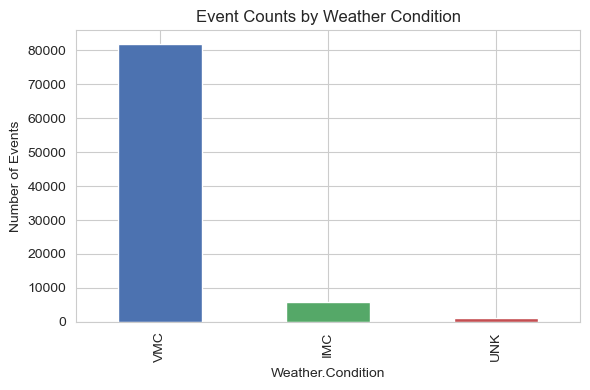

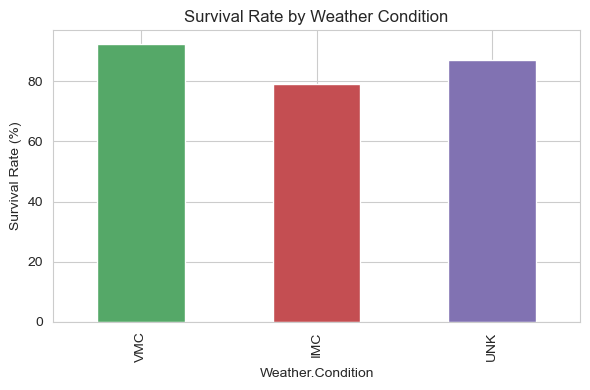

In [82]:
# 1) Event share
plt.figure(figsize=(6,4))
weather.set_index('Weather.Condition')['Events'].plot(kind='bar', color=['#4C72B0','#55A868','#C44E52'])
plt.ylabel('Number of Events')
plt.title('Event Counts by Weather Condition')
plt.tight_layout()
plt.savefig('weather_event_counts.png', dpi=300)
plt.show()

# 2) Survival (or Fatality) Rate
plt.figure(figsize=(6,4))
(weather.set_index('Weather.Condition')['Survival_Rate']*100).plot(kind='bar', color=['#55A868','#C44E52','#8172B2'])
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Weather Condition')
plt.tight_layout()
plt.savefig('weather_survival_rate.png', dpi=300)
plt.show()

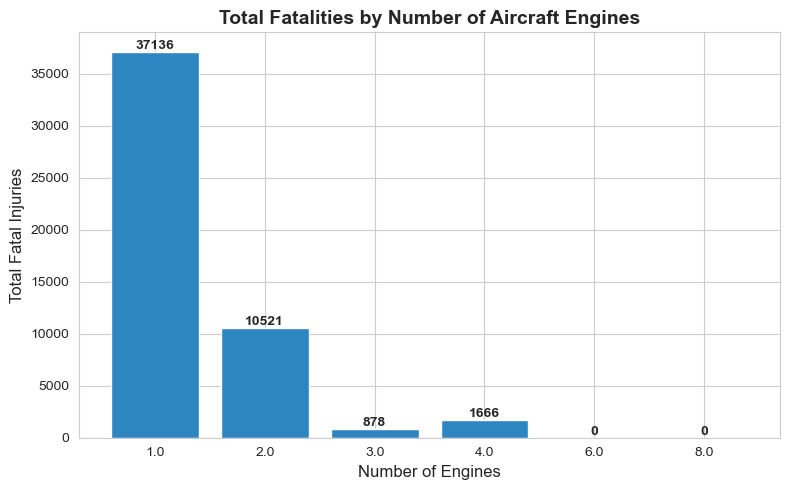

In [83]:
import matplotlib.pyplot as plt

# Group data by Number of Engines
engine_fatality = df1.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum().reset_index()

# Sort by number of engines for cleaner visuals
engine_fatality = engine_fatality.sort_values('Number.of.Engines')

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    engine_fatality['Number.of.Engines'].astype(str),
    engine_fatality['Total.Fatal.Injuries'],
    color='#2E86C1'
)

# Labels and title
plt.title('Total Fatalities by Number of Aircraft Engines', fontsize=14, weight='bold')
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


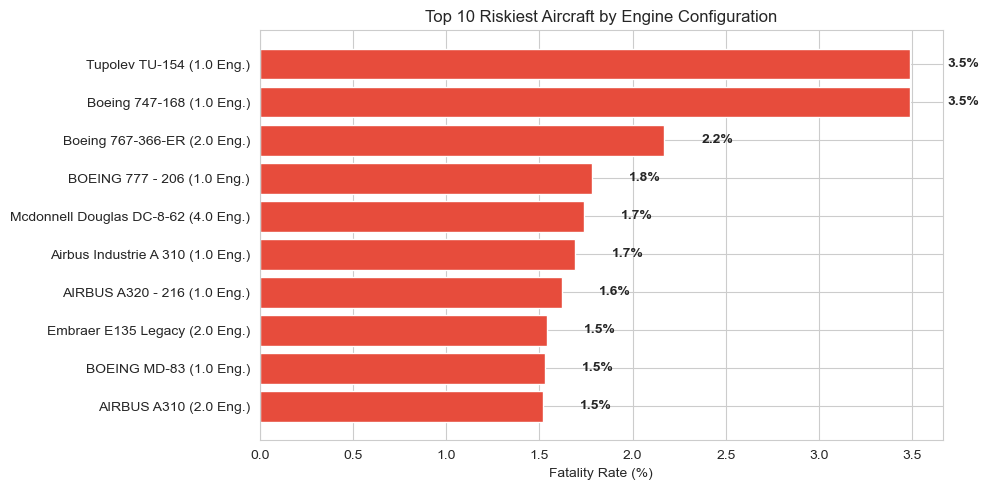

In [84]:
import matplotlib.pyplot as plt

# Group by Make, Model, and Number of Engines
engine_risk = (
    df1.groupby(['Make', 'Model', 'Number.of.Engines'])
    .agg({'Total.Fatal.Injuries': 'sum', 'Event.Id': 'count'})
    .reset_index()
)

# Calculate fatality rate per incident
engine_risk['Fatality_Rate'] = engine_risk['Total.Fatal.Injuries'] / engine_risk['Event.Id']

# Top 10 riskiest aircraft configurations
top10_engine_risk = engine_risk.sort_values('Fatality_Rate', ascending=False).head(10)

# Combine Make + Model for display
top10_engine_risk['Aircraft'] = (
    top10_engine_risk['Make'] + ' ' +
    top10_engine_risk['Model'] +
    ' (' + top10_engine_risk['Number.of.Engines'].astype(str) + ' Eng.)'
)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(
    top10_engine_risk['Aircraft'],
    top10_engine_risk['Fatality_Rate'] * 0.01,
    color='#E74C3C'
)
plt.xlabel('Fatality Rate (%)')
plt.title('Top 10 Riskiest Aircraft by Engine Configuration')
plt.gca().invert_yaxis()

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


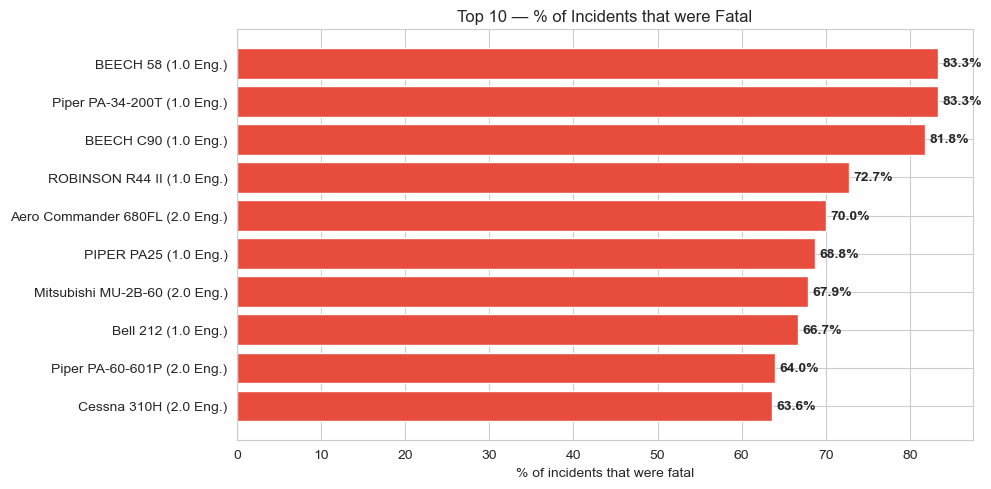

In [85]:
# Option A: % of incidents that were fatal (recommended)
# Assume df1 is incident-level and Event.Id identifies incidents

# compute per-incident flag
df1['fatal_incident_flag'] = (df1['Total.Fatal.Injuries'] > 0).astype(int)

# group and aggregate
engine_risk = (
    df1.groupby(['Make', 'Model', 'Number.of.Engines'])
    .agg(total_fatalities=('Total.Fatal.Injuries', 'sum'),
         total_incidents=('Event.Id', 'count'),
         fatal_incidents=('fatal_incident_flag', 'sum'))
    .reset_index()
)

# percent of incidents that were fatal
engine_risk['pct_fatal_incidents'] = engine_risk['fatal_incidents'] / engine_risk['total_incidents'] * 100

# filter small samples
engine_risk = engine_risk[engine_risk['total_incidents'] >= 10]

# top 10 riskiest by this metric
top10 = engine_risk.sort_values('pct_fatal_incidents', ascending=False).head(10)

# display / plot
top10['Aircraft'] = top10['Make'] + ' ' + top10['Model'] + ' (' + top10['Number.of.Engines'].astype(str) + ' Eng.)'

plt.figure(figsize=(10,5))
bars = plt.barh(top10['Aircraft'], top10['pct_fatal_incidents'], color='#E74C3C')
plt.xlabel('% of incidents that were fatal')
plt.title('Top 10 — % of Incidents that were Fatal')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


## CONCLUSION 
Prioritize Certified, Professionally Manufactured Aircraft
 Amateur-built aircraft have less than half the survival rate. This is     non-negotiable for a corporate fleet.
 Procure from the Vetted "Top 10 Safest Models" List
Base purchasing decisions on our data-driven list of models with proven safety records since the year 2000.
 Apply Strict Safety Thresholds
 Only consider aircraft meeting these minimums:
Survival Rate ≥ 0.85
Fatality Rate ≤ 0.07
≥ 10 Recorded Incidents (for statistical significance)
